In [2]:
import requests
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import statistics
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

In [1]:
a = open('../data/error_tweets.txt', 'r')
train_tweets = a.read().split('\n')
a.close()

b = open('../data/error_labels.txt', 'r')
train_labels = b.read().split('\n')
b.close()

### Tweet Lengths

<AxesSubplot:title={'center':'Tweet Length Distribution By Character'}, ylabel='Frequency'>

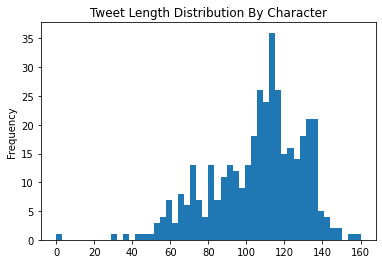

In [3]:
# Create a new list of the tweets without any punctuation
no_punc = []
for tweet in train_tweets:
  no_punc.append(tweet.translate(str.maketrans('', '', string.punctuation)))

# Makes all tweets lowercase
train_tweets = [x.lower() for x in no_punc]

# Define a dataframe of the tweets without punctuation and their labels
df = pd.DataFrame()
df['tweet']  = train_tweets
df['label']  = train_labels

# Append the length of each tweet to our dataframe
tweet_length = []
for i in df['tweet']:
  tweet_length.append(len(i))
df['tweet_length'] = tweet_length

df['tweet_length'].plot(
    kind='hist',
    bins=50,
    title='Tweet Length Distribution By Character')


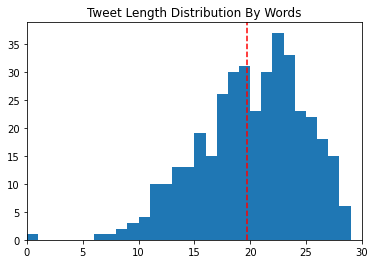

Text(0.5, 1.0, 'Average Tweet Length by Sentiment')

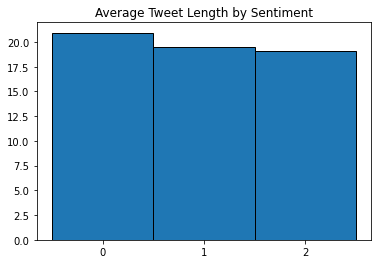

In [4]:
# Length in words
tweet_lengths = []
for i in range(len(df)):
  tweet_lengths.append(len(df.tweet.iloc[i].split()))

# fixed bin size
bins = np.arange(0, 30, 1) # fixed bin size

plt.xlim([min(tweet_lengths), max(tweet_lengths)])

plt.hist(tweet_lengths, bins=bins)
plt.title('Tweet Length Distribution By Words')
plt.axvline(x=statistics.mean(tweet_lengths), color="red", ls="dashed")

plt.show()

d={}

# Mean word length for each sentiment
for i in range(df["label"].nunique() - 1):
  labels = df[df["label"]==str(i)]
  tweet_lengths = []
  for j in range(len(labels)):
    tweet_lengths.append(len(labels.iloc[j][0].split()))
  d[i]= round(statistics.mean(tweet_lengths), 3)

plt.bar(d.keys(), d.values(), 1, edgecolor='black')
plt.xticks(range(3))
plt.title('Average Tweet Length by Sentiment')


### What words come up the most?


user 143
tomorrow 62
im 39
just 37
night 30
1st 26
like 25
going 25
saturday 23
friday 23
sunday 21
time 18
want 17
2nd 17
amp 15
dont 15
come 14
day 14
ill 13
monday 13


<AxesSubplot:title={'center':'Top 20 words in tweets after removing stop words'}, xlabel='TweetText'>

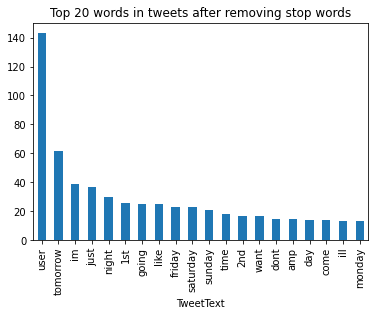

In [5]:
# Using CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['tweet'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])
df2.groupby('TweetText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in tweets after removing stop words')

In [6]:
len(df.iloc[0][0].split())

d={}

for i in range(len(df)):
  for j in df.iloc[i][0].split():
    if j not in d:
      d[j] = 1
    else:
      d[j] += 1

In [7]:
word_occurence = pd.DataFrame(list(d.items()),columns = ['Word','Occurence'])

In [8]:
word_occurence = word_occurence.sort_values("Occurence", ascending=False)
#3rd most common "word" was an empty string so remove that
#word_occurence = word_occurence.drop([10])
word_occurence.iloc[0:10]

,Word,Occurence
34,the,349
99,to,179
26,i,149
0,user,143
44,on,123
22,in,121
153,and,104
128,of,98
19,a,91
147,for,86


<AxesSubplot:xlabel='Word'>

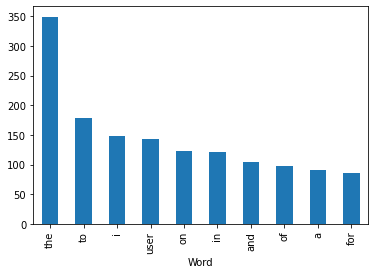

In [9]:
word_occurence.iloc[0:10].plot.bar(x="Word", y="Occurence", legend=None)

Most common words without filler words

In [26]:
df['text_punct'] = df['tweet'].str.replace('[^\w\s]','')
df['text_punct'].head()

#Importing stopwords from nltk library
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Applying the stopwords to 'text_punct' and store into 'text_stop'
df["text_stop"] = df["text_punct"].apply(stopwords)
df["text_stop"].head()


#removing the 10 most common words
from collections import Counter
cnt = Counter()
for text in df["text_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

# Removing the frequent words
freq = set([w for (w, wc) in cnt.most_common(10)])
# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
# Passing the function freqwords
df["text_common"] = df["text_stop"].apply(freqwords)
df["text_common"].head()

print(df)



d={}

for i in range(389):
  for j in df.iloc[i][4].split():
    if j not in d:
      d[j] = 1
    else:
      d[j] += 1

                                                 tweet label  tweet_length  \
0    user user user user user ok thank you curtis m...     2           104   
1    her is a chevy spark in dons favorite color  i...     1           108   
2    user im right in thinking youre at whoovervill...     2           109   
3    this may be the one time im disappointed ye is...     0           113   
4    user   suge is right that movie is exaggerated...     1           130   
..                                                 ...   ...           ...   
384  just bought my 1st heineken beer in las vegas ...     1           101   
385  anyone interested in a couple of tickets for r...     1           100   
386  sun 1206  thor the elf hanging out on our tv t...     1            73   
387  barca beats joventut 8677 in 1st preseason gam...     1           114   
388                                                                      0   

                                            text_punct  \
0    

In [27]:
word_occurence = pd.DataFrame(list(d.items()),columns = ['Word','Occurence'])
word_occurence = word_occurence.sort_values("Occurence", ascending=False)
word_occurence.iloc[0:20]

,Word,Occurence
0,user,143
17,may,73
111,tomorrow,62
23,im,39
272,night,30
223,1st,26
149,going,25
50,like,25
35,one,25
6,saturday,23


<AxesSubplot:xlabel='Word'>

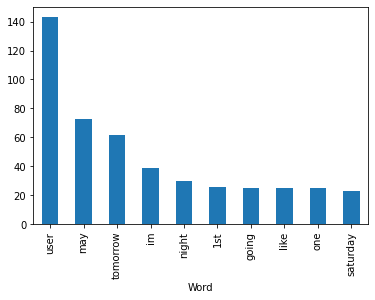

In [28]:
word_occurence.iloc[0:10].plot.bar(x="Word", y="Occurence", legend=None)

Most common words by sentiment

In [29]:
top_words = pd.DataFrame()

for i in range(df["label"].nunique() - 1):
  sentiment = df[df["label"]==str(i)]
  d={}

  for j in range(len(sentiment)):
    for k in sentiment.iloc[j][5].split():
      if k not in d:
        d[k] = 1
      else:
        d[k] += 1
  word_occurence = pd.DataFrame(list(d.items()),columns = ['Word','Occurence'])
  word_occurence = word_occurence.sort_values("Occurence", ascending=False)
  word_occurence=word_occurence.iloc[0:30]
  top_words[i]=word_occurence.iloc[:,0].values
top_words[0:15]

,0,1,2
0,friday,sunday,see
1,get,get,go
2,cant,monday,time
3,want,time,want
4,go,friday,sun
5,last,amp,girls
6,album,2nd,birthday
7,2nd,day,friday
8,nicki,see,come
9,love,ill,season


Word cloud

In [30]:
from PIL import Image
import numpy as np
mask = np.array(Image.open('./twitter.jpeg'))

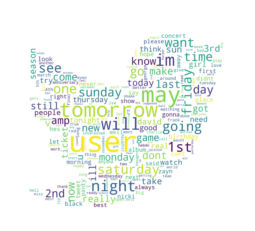

In [31]:
from wordcloud import WordCloud

text = " ".join(tweet for tweet in df.tweet)

wordcloud = WordCloud(background_color="white", mask=mask, collocations=False).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud for each sentiment



Sentiment: 0


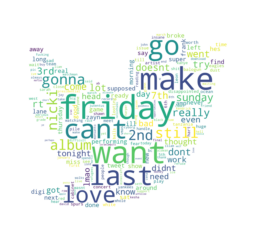


Sentiment: 1


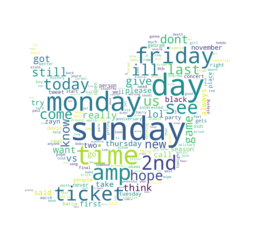


Sentiment: 2


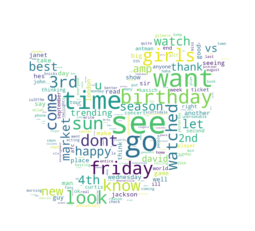

In [32]:
for i in range(df["label"].nunique() - 1):
  sentiment = df[df["label"]==str(i)]
  text = " ".join(tweet for tweet in sentiment.text_common)
  if (text != ""):
    print("\nSentiment:", i)
    wordcloud = WordCloud(background_color="white", mask=mask, collocations=False).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()